# TensorFlow Tutorial #1- A Simple Artificial Neural Network

#### First we will import relevant packages 

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

#### This tutorial was made using TensorFlow version 1.8

In [114]:
tf.__version__

'1.8.0'

#### Loading the MNIST dataset

In [115]:
from tensorflow.examples.tutorials.mnist import input_data
data=input_data.read_data_sets('data/MNIST',one_hot=True)

Extracting data/MNIST\train-images-idx3-ubyte.gz
Extracting data/MNIST\train-labels-idx1-ubyte.gz
Extracting data/MNIST\t10k-images-idx3-ubyte.gz
Extracting data/MNIST\t10k-labels-idx1-ubyte.gz


#### Displaying the size of Training, Validation and Test datasets
Note: Validation set is not used in this example.

In [116]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.images)))
print("- Validation-set:\t{}".format(len(data.validation.images)))
print("- Test-set:\t\t{}".format(len(data.test.images)))

Size of:
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


#### Declaration of some data-dimensions

In [117]:
img_size = 28

# The images are stored in one-dimensional arrays of this length.

img_size_flat = img_size * img_size 

# Tuple with height and width of images used to reshape arrays.

img_shape = (img_size,img_size)

# Number of classes, one class for each of 10 digits.

num_classes = 10

#### One-Hot Encoding

The output-data is loaded as both integer class-numbers and so-called One-Hot encoded arrays. This means the class-numbers have been converted from a single integer to a vector whose length equals the number of possible classes. All elements of the vector are zero except for the $i$'th element which is 1 and means the class is $i$. For example, one-hot encoded array for an image containing '7' is: [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.].

In [118]:
data.test.labels[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

#### Conversion of image classes from one-hot encoded format to integers  

In [119]:
data.test.cls=np.argmax(data.test.labels,axis=1)

#### Displaying image class (as integer) for first 5 test images

In [120]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

#### Helper Function to plot Images

In [121]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

#### Plot a few images to see if data is correct

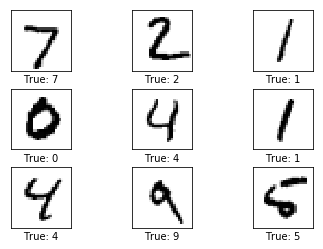

In [122]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

### TensorFlow Graph
A TensorFlow graph consists of the following parts which will be detailed below:

- Placeholder variables used to feed input into the graph.
- Model variables that are going to be optimized so as to make the model perform better.
- The model which is essentially just a mathematical function that calculates some output given the input in the placeholder variables and the model variables.
- A cost measure that can be used to guide the optimization of the variables.
- An optimization method which updates the variables of the model.

#### Placeholder variables
First we define the placeholder variable for the input images. The data-type is set to `float32` and the shape is set to `[None, img_size_flat]`, where None means that the tensor may hold an arbitrary number of images with each image being a vector of length `img_size_flat`.

In [123]:
x = tf.placeholder(tf.float32, [None, img_size_flat])

Next we have the placeholder variable for the true labels associated with the images that were input in the placeholder variable `x`. The shape of this placeholder variable is `[None, num_classes]` which means it may hold an arbitrary number of labels and each label is a vector of length `num_classes` which is 10 in this case.

In [124]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

Finally we have the placeholder variable for the true class of each image in the placeholder variable `x`. 

In [125]:
y_true_cls = tf.placeholder(tf.int64, [None])

#### Variables to be optimized

In [126]:
weights=tf.Variable(tf.truncated_normal([img_size_flat,num_classes], stddev=0.05))

In [127]:
biases=tf.Variable(tf.constant(0.05, shape=[num_classes]))

#### Model
This simple mathematical model multiplies the images in the placeholder variable `x` with the weights and then adds the biases.

Note that the name `logits` is typical TensorFlow terminology, but other people may call the variable something else.

In [128]:
logits = tf.matmul(x, weights) + biases

Now `logits` is a matrix with `num_images` rows and `num_classes` columns, where the element of the $i$'th row and $j$'th column is an estimate of how likely the $i$'th input image is to be of the $j$'th class.

However, these estimates are a bit rough and difficult to interpret because the numbers may be very small or large, so we want to normalize them so that each row of the logits matrix sums to one, and each element is limited between zero and one. This is calculated using the so-called softmax function and the result is stored in `y_pred`.

In [129]:
y_pred = tf.nn.softmax(logits)

#### Calculating predicted class (in integer form)

In [130]:
y_pred_cls = tf.argmax(y_pred, axis=1)

#### Cost Function

In [131]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_true)

In [132]:
cost = tf.reduce_mean(cross_entropy)

#### Optimization

In [133]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

#### Performance Measures
We need a few more performance measures to display the progress to the user.

In [134]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [135]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### TensorFlow Run
#### Create TensorFlow session
Once the TensorFlow graph has been created, we have to create a TensorFlow session which is used to execute the graph.

In [136]:
session = tf.Session()

#### Initialize Variables
The variables for `weights` and `biases` must be initialized before we start optimizing them.

In [137]:
session.run(tf.global_variables_initializer())

#### Function to perform optimization iterations

In [138]:
batch_size = 100
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

#### Helper-functions to show performance

Dict with the test-set data to be used as input to the TensorFlow graph.

In [139]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

Function for printing the classification accuracy on the test-set.

In [140]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

Function for printing and plotting the confusion matrix using scikit-learn.

In [141]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Function for plotting examples of images from the test-set that have been mis-classified.

In [142]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

#### Performance before any optimization

In [143]:
print_accuracy()

Accuracy on test-set: 11.4%


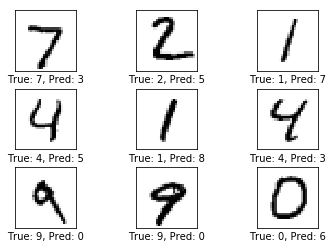

In [144]:
plot_example_errors()

#### Performance after 1 optimization iteration

In [145]:
optimize(num_iterations=1)

In [146]:
print_accuracy()

Accuracy on test-set: 40.0%


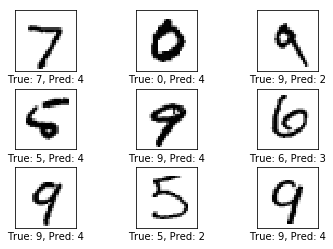

In [147]:
plot_example_errors()

#### Performance after 10 optimization iterations

In [148]:
optimize(num_iterations=9)

In [149]:
print_accuracy()

Accuracy on test-set: 75.2%


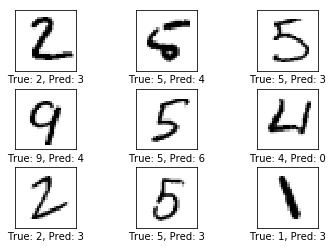

In [150]:
plot_example_errors()

####  Performance after 1000 iterations

In [151]:
# We have already performed 10 iterations.
optimize(num_iterations=990)

In [152]:
print_accuracy()

Accuracy on test-set: 91.9%


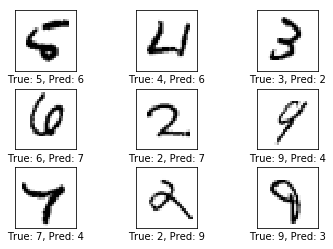

In [153]:
plot_example_errors()

[[ 952    0    4    1    0    6   11    4    2    0]
 [   0 1110    3    2    0    2    4    2   12    0]
 [   6    8  918   11   10    2   15   17   41    4]
 [   3    1   23  906    0   23    4   21   24    5]
 [   1    2    3    1  918    0   14    4    8   31]
 [  12    4    6   38   11  748   25   11   29    8]
 [   8    3    4    1   10    8  920    2    2    0]
 [   2    9   23    4    6    0    0  967    2   15]
 [   6    9    7   18    9   20   14   18  868    5]
 [  10    7    2   10   35    5    1   48    9  882]]


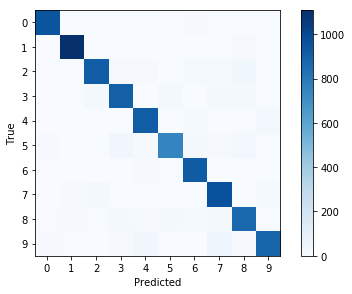

In [154]:
print_confusion_matrix()

### Exercises
These are a few suggestions for exercises that may help improve your skills with TensorFlow.
- Change the learning-rate for the optimizer.
- Change the optimizer to e.g. AdagradOptimizer or AdamOptimizer.
- Change the batch-size to e.g. 1 or 1000.
- How do these changes affect the performance?